In [22]:
import pandas as pd

def display_full(data_frame):
    pd.set_option('display.max_columns', len(data_frame.columns))
    display(data_frame)

raw_df = (pd.read_csv("data.csv"))
display_full(raw_df)
# display(df.columns)

,id,listing_url,scrape_id,last_scraped,name,picture_url,host_id,host_url,host_name,host_since,host_location,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,2818,https://www.airbnb.com/rooms/2818,20201009050447,2020-10-11,Quiet Garden View Room & Super Fast WiFi,https://a0.muscache.com/pictures/10272854/8dcc...,3159,https://www.airbnb.com/users/show/3159,Daniel,2008-09-24,"Amsterdam, Noord-Holland, The Netherlands",NaN,NaN,100%,t,https://a0.muscache.com/im/users/3159/profile_...,https://a0.muscache.com/im/users/3159/profile_...,Indische Buurt,1.0,1.0,"['email', 'phone', 'reviews', 'jumio', 'offlin...",t,t,"Amsterdam, North Holland, Netherlands",Oostelijk Havengebied - Indische Buurt,NaN,52.36575,4.94142,Private room in apartment,Private room,2,NaN,1.5 shared baths,1.0,2.0,"[""Laptop-friendly workspace"", ""Coffee maker"", ...",$59.00,3,1125,3,3,1125,1125,3.0,1125.0,NaN,t,0,0,0,0,2020-10-11,278,6,0,2009-03-30,2020-02-14,98.0,10.0,10.0,10.0,10.0,9.0,10.0,NaN,t,1,0,1,0,1.98
1,20168,https://www.airbnb.com/rooms/20168,20201009050447,2020-10-11,Studio with private bathroom in the centre 1,https://a0.muscache.com/pictures/69979628/fd6a...,59484,https://www.airbnb.com/users/show/59484,Alexander,2009-12-02,"Amsterdam, Noord-Holland, The Netherlands",NaN,NaN,100%,f,https://a0.muscache.com/im/pictures/user/65092...,https://a0.muscache.com/im/pictures/user/65092...,Grachtengordel,2.0,2.0,"['email', 'phone', 'reviews', 'jumio', 'offlin...",t,t,"Amsterdam, North Holland, Netherlands",Centrum-Oost,NaN,52.36424,4.89396,Private room in townhouse,Private room,2,NaN,1 private bath,1.0,1.0,"[""Laptop-friendly workspace"", ""TV"", ""Carbon mo...",$236.00,1,365,4,4,60,365,4.0,250.7,NaN,t,0,0,0,0,2020-10-11,340,48,0,2010-03-02,2020-04-09,89.0,10.0,10.0,10.0,10.0,10.0,9.0,NaN,t,2,0,2,0,2.63
2,25428,https://www.airbnb.com/rooms/25428,20201009050447,2020-10-11,Lovely apt in City Centre (w.lift) near Jordaan,https://a0.muscache.com/pictures/138431/7079a9...,56142,https://www.airbnb.com/users/show/56142,Joan,2009-11-20,"New York, New York, United States",within a few hours,100%,39%,t,https://a0.muscache.com/im/users/56142/profile...,https://a0.muscache.com/im/users/56142/profile...,Grachtengordel,2.0,2.0,"['email', 'phone', 'reviews']",t,f,NaN,Centrum-West,NaN,52.37297,4.88339,Entire apartment,Entire home/apt,3,NaN,1 bath,1.0,1.0,"[""Laptop-friendly workspace"", ""Kitchen"", ""Dish...",$125.00,14,180,14,14,180,180,14.0,180.0,NaN,t,0,0,4,58,2020-10-11,5,2,0,2018-01-21,2020-02-09,100.0,10.0,10.0,10.0,10.0,10.0,10.0,NaN,f,1,1,0,0,0.15
3,27886,https://www.airbnb.com/rooms/27886,20201009050447,2020-10-10,"Romantic, stylish B&B houseboat in canal district",https://a0.muscache.com/pictures/02c2da9d-660e...,97647,https://www.airbnb.com/users/show/97647,Flip,2010-03-23,"Amsterdam, Noord-Holland, The Netherlands",NaN,NaN,100%,t,https://a0.muscache.com/im/users/97647/p

In [49]:
# Определяем стратегии трансформации данных
# Сама трансформация определена в mappers.py
# TODO: Разобраться с категориальными переменными

col_strategies = {
#     'id': 'Ignore',
#     'listing_url': 'Ignore',
#     'scrape_id': 'Ignore',
#     'last_scraped': 'Ignore',
#     'name': 'Ignore',
#     'picture_url': 'Ignore',
#     'host_id': 'Ignore',
#     'host_url': 'Ignore',
#     'host_name': 'Ignore',
#     'host_since': 'Ignore',
#     'host_location': 'Ignore',
#     'host_response_time': 'Ignore',
#     'host_response_rate': 'Percentage', Очень много пропущенных!
#     'host_acceptance_rate': 'Percentage', Очень много пропущенных!
    'host_is_superhost': 'Boolean',
#     'host_thumbnail_url': 'Ignore',
#     'host_picture_url': 'Ignore',
#     'host_neighbourhood': 'Ignore',
    'host_listings_count': 'Float',
#     'host_total_listings_count': 'Ignore',
#     'host_verifications': 'Ignore',
    'host_has_profile_pic': 'Boolean',
    'host_identity_verified': 'Boolean',
#     'neighbourhood': 'Ignore',
#     'neighbourhood_cleansed': 'Ignore',
#     'neighbourhood_group_cleansed': 'Ignore',
#     'latitude': 'Ignore',
#     'longitude': 'Ignore',
#     'property_type': 'Ignore',
#     'room_type': 'Ignore',
#     'accommodates': 'Ignore',
#     'bathrooms': 'Integer', Очень много пропущенных!
#     'bathrooms_text': 'Ignore',
    'bedrooms': 'Float',
    'beds': 'Float',
#     'amenities': 'Ignore',
    'price': 'Price',
    'minimum_nights': 'Float',
    'maximum_nights': 'Float',
#     'minimum_minimum_nights': 'Ignore',
#     'maximum_minimum_nights': 'Ignore',
#     'minimum_maximum_nights': 'Ignore',
#     'maximum_maximum_nights': 'Ignore',
#     'minimum_nights_avg_ntm': 'Ignore',
#     'maximum_nights_avg_ntm': 'Ignore',
#     'calendar_updated': 'Ignore',
    'has_availability': 'Boolean',
#     'availability_30': 'Ignore',
#     'availability_60': 'Ignore',
#     'availability_90': 'Ignore',
#     'availability_365': 'Ignore',
#     'calendar_last_scraped': 'Ignore',
    'number_of_reviews': 'Float',
#     'number_of_reviews_ltm': 'Ignore',
#     'number_of_reviews_l30d': 'Ignore',
#     'first_review': 'Ignore',
#     'last_review': 'Ignore',
    'review_scores_rating': 'Float',
    'review_scores_accuracy': 'Float',
    'review_scores_cleanliness': 'Float',
    'review_scores_checkin': 'Float',
    'review_scores_communication': 'Float',
    'review_scores_location': 'Float',
    'review_scores_value': 'Float',
#     'license': 'Ignore',
    'instant_bookable': 'Boolean',
#     'calculated_host_listings_count': 'Ignore',
#     'calculated_host_listings_count_entire_homes': 'Ignore',
#     'calculated_host_listings_count_private_rooms': 'Ignore',
#     'calculated_host_listings_count_shared_rooms': 'Ignore',
    'reviews_per_month': 'Float',
}

import mappers
import importlib
importlib.reload(mappers)

index = range(0, len(raw_df.columns));
df = pd.DataFrame([], index=index)

for col_name in raw_df.columns:
    col_strategy = col_strategies.get(col_name, None)
    if (col_strategy is not None):
        mapped_column = mappers.map_column(raw_df[col_name], col_strategy)
#         display(mapped_column)
        if (mapped_column is not None):
            df = df.join(mapped_column.reindex(index))
    
display(df)

,host_is_superhost,host_listings_count,host_has_profile_pic,host_identity_verified,bedrooms,beds,price,minimum_nights,maximum_nights,has_availability,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,reviews_per_month
0,1,1.0,1,1,1.0,2.0,59.0,3.0,1125.0,1,278.0,98.0,10.0,10.0,10.0,10.0,9.0,10.0,1,1.98
1,0,2.0,1,1,1.0,1.0,236.0,1.0,365.0,1,340.0,89.0,10.0,10.0,10.0,10.0,10.0,9.0,1,2.63
2,1,2.0,1,0,1.0,1.0,125.0,14.0,180.0,1,5.0,100.0,10.0,10.0,10.0,10.0,10.0,10.0,0,0.15
3,1,1.0,1,1,1.0,1.0,138.0,2.0,730.0,1,219.0,99.0,10.0,10.0,10.0,10.0,10.0,10.0,1,2.05
4,1,2.0,1,1,1.0,1.0,75.0,2.0,1825.0,1,336.0,97.0,10.0,10.0,10.0,10.0,10.0,10.0,0,2.72
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66,0,1.0,1,0,3.0,3.0,97.0,4.0,20.0,1,48.0,96.0,9.0,9.0,10.0,10.0,9.0,9.0,0,0.43
67,0,1.0,1,0,1.0,1.0,168.0,2.0,31.0,1,139.0,86.0,8.0,7.0,8.0,8.0,9.0,7.0,0,1.24
68,0,1.0,1,1,1.0,2.0,200.0,2.0,30.0,1,102.0,97.0,10.0,9.0,10.0,10.0,10.0,10.0,0,0.93
69,0,2.0,1,1,2.0,2.0,245.0,21.0,100.0,1,27.0,89.0,9.0,9.0,10.0,10.0,9.0,9.0,1,0.24


In [42]:
# Смотрим процент пропущенных значений
df.isna().mean().round(4).multiply(100)

host_is_superhost              0.00
host_listings_count            0.00
host_has_profile_pic           0.00
host_identity_verified         0.00
bedrooms                       2.82
beds                           0.00
price                          0.00
minimum_nights                 0.00
maximum_nights                 0.00
has_availability               0.00
number_of_reviews              0.00
review_scores_rating           1.41
review_scores_accuracy         1.41
review_scores_cleanliness      1.41
review_scores_checkin          1.41
review_scores_communication    1.41
review_scores_location         1.41
review_scores_value            1.41
instant_bookable               0.00
reviews_per_month              1.41
dtype: float64

host_is_superhost


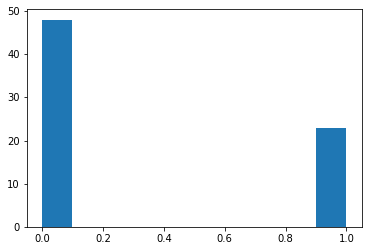

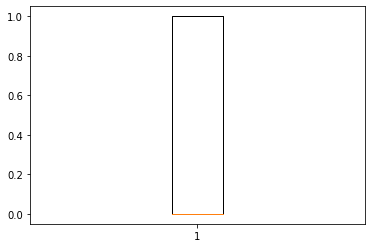

host_listings_count


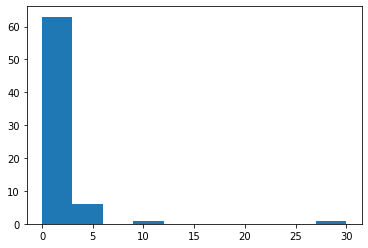

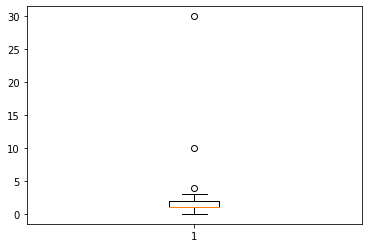

host_has_profile_pic


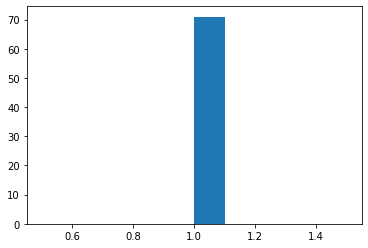

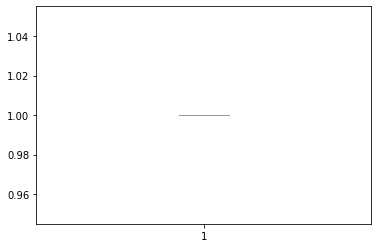

host_identity_verified


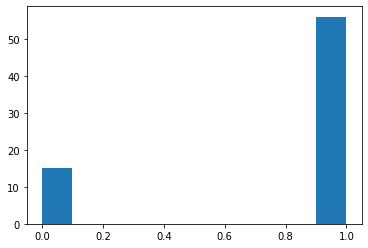

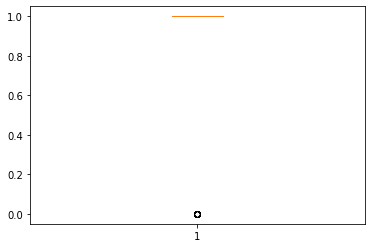

bedrooms


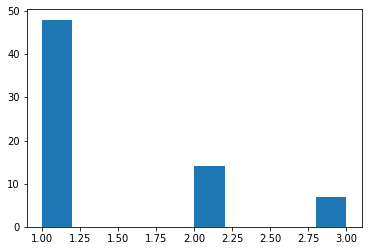

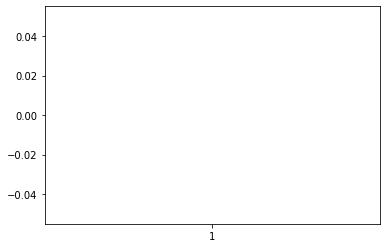

beds


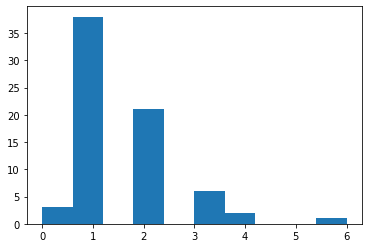

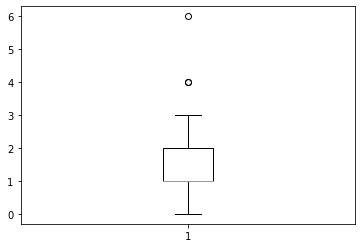

price


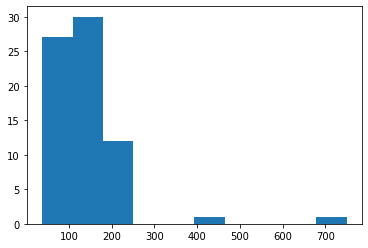

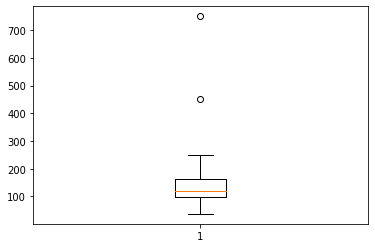

minimum_nights


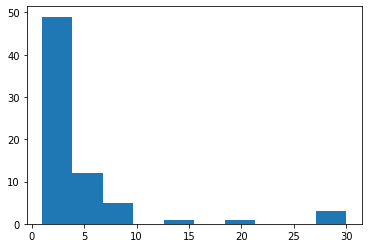

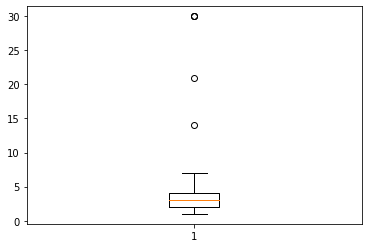

maximum_nights


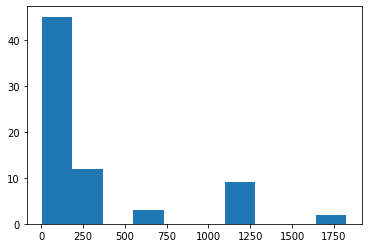

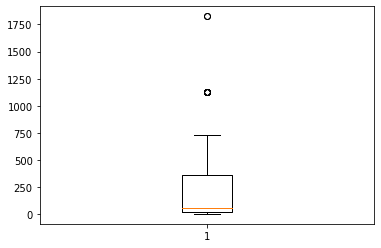

has_availability


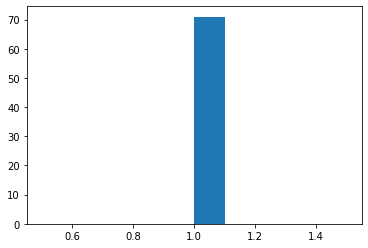

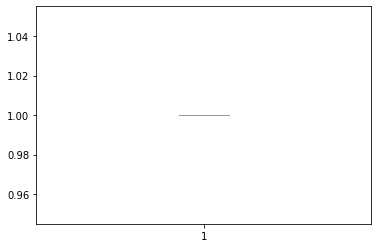

number_of_reviews


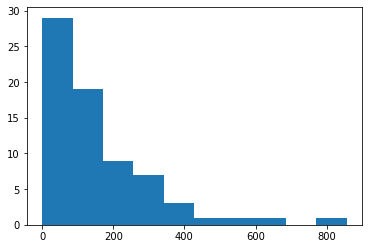

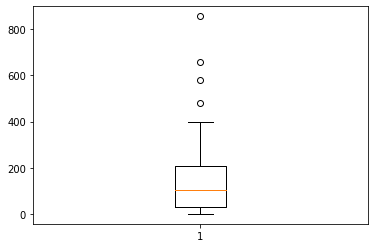

review_scores_rating


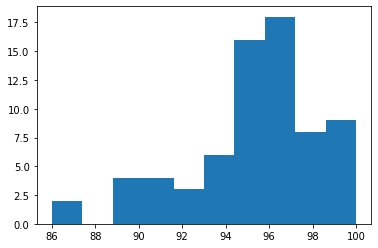

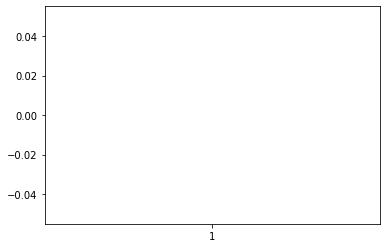

review_scores_accuracy


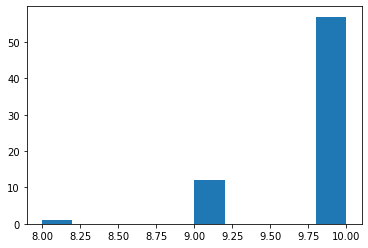

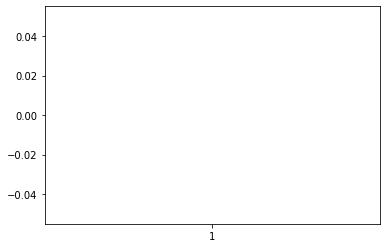

review_scores_cleanliness


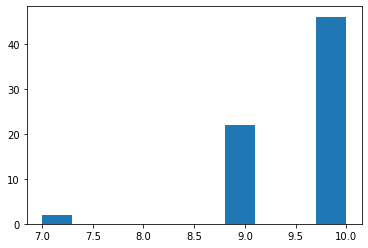

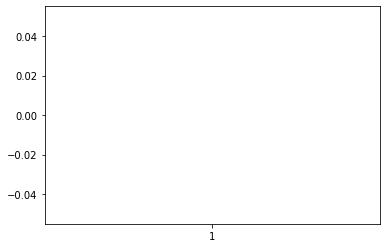

review_scores_checkin


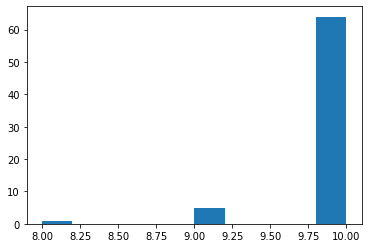

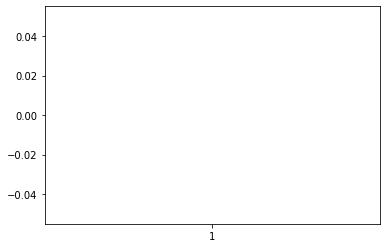

review_scores_communication


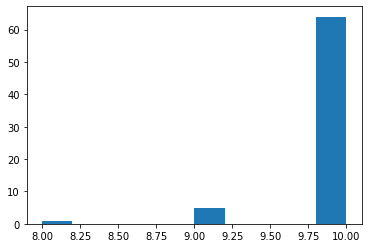

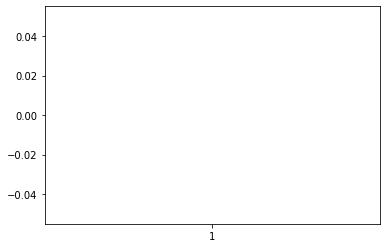

review_scores_location


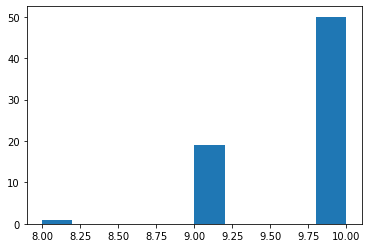

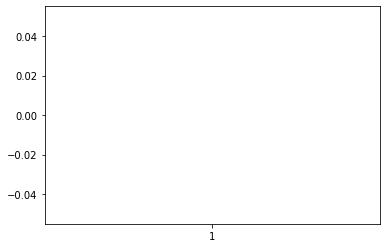

review_scores_value


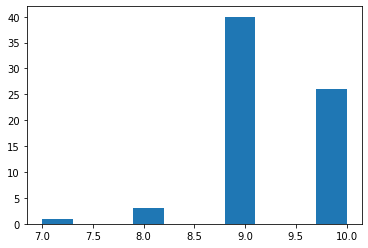

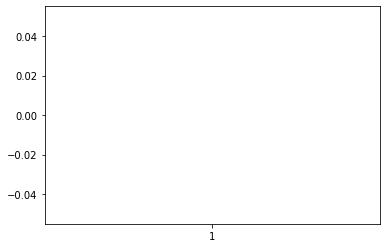

instant_bookable


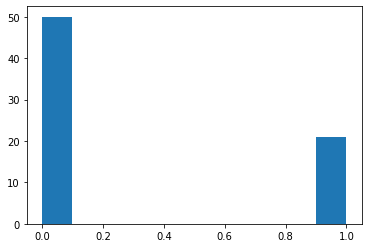

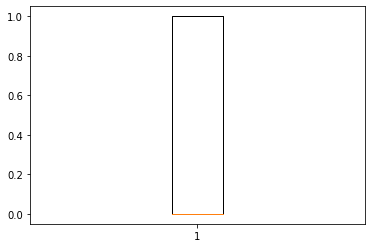

reviews_per_month


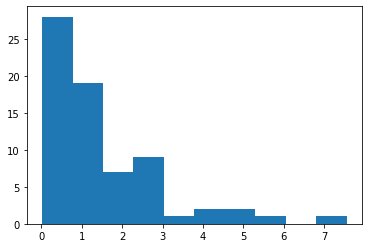

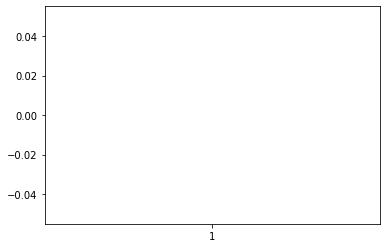

,host_is_superhost,host_listings_count,host_has_profile_pic,host_identity_verified,bedrooms,beds,price,minimum_nights,maximum_nights,has_availability,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,reviews_per_month
count,71.000000,71.000000,71.0,71.000000,69.000000,71.000000,71.000000,71.000000,71.000000,71.0,71.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,71.000000,70.000000
mean,0.323944,1.887324,1.0,0.788732,1.405797,1.577465,142.283662,4.549296,314.267606,1.0,152.633803,95.257143,9.800000,9.600000,9.900000,9.900000,9.700000,9.300000,0.295775,1.463143
std,0.471310,3.615638,0.0,0.411113,0.671233,0.980699,99.552363,6.098685,453.775462,0.0,165.142816,3.183680,0.437384,0.646058,0.346828,0.346828,0.491964,0.622058,0.459639,1.480409
min,0.000000,0.000000,1.0,0.000000,1.000000,0.000000,37.000000,1.000000,5.000000,1.0,0.000000,86.000000,8.000000,7.000000,8.000000,8.000000,8.000000,7.000000,0.000000,0.020000
25%,0.000000,1.000000,1.0,1.000000,1.000000,1.000000,96.500000,2.000000,21.000000,1.0,32.000000,94.000000,10.000000,9.000000,10.000000,10.000000,9.000000,9.000000,0.000000,0.307500
50%,0.000000,1.000000,1.0,1.000000,1.000000,1.000000,120.000000,3.000000,60.000000,1.0,102.000000,95.500000,10.000000,10.000000,10.000000,10.000000,10.000000,9.000000,0.000000,1.030000
75%,1.000000,2.000000,1.0,1.000000,2.000000,2.000000,162.500000,4.000000,365.000000,1.0,207.500000,97.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,1.000000,2.032500
max,1.000000,30.000000,1.0,1.000000,3.000000,6.000000,750.000000,30.000000,1825.000000,1.0,856.000000,100.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,1.000000,7.550000


In [43]:
# Посмотрим на распределение цен на апартаменты:

import matplotlib.pyplot as plt

for column in df.columns:
    series = df[column]
    print(column)
    plt.hist(series)
    plt.show()

    plt.boxplot(series)
    plt.show()

In [54]:
# Убираем выбросы по цене
df = df.where(df['price'] > 300)
display(df)
# df.describe()

,host_is_superhost,host_listings_count,host_has_profile_pic,host_identity_verified,bedrooms,beds,price,minimum_nights,maximum_nights,has_availability,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,reviews_per_month
0,<NA>,NaN,<NA>,<NA>,NaN,NaN,NaN,NaN,NaN,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,<NA>,NaN
1,<NA>,NaN,<NA>,<NA>,NaN,NaN,NaN,NaN,NaN,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,<NA>,NaN
2,<NA>,NaN,<NA>,<NA>,NaN,NaN,NaN,NaN,NaN,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,<NA>,NaN
3,<NA>,NaN,<NA>,<NA>,NaN,NaN,NaN,NaN,NaN,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,<NA>,NaN
4,<NA>,NaN,<NA>,<NA>,NaN,NaN,NaN,NaN,NaN,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,<NA>,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66,<NA>,NaN,<NA>,<NA>,NaN,NaN,NaN,NaN,NaN,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,<NA>,NaN
67,<NA>,NaN,<NA>,<NA>,NaN,NaN,NaN,NaN,NaN,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,<NA>,NaN
68,<NA>,NaN,<NA>,<NA>,NaN,NaN,NaN,NaN,NaN,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,<NA>,NaN
69,<NA>,NaN,<NA>,<NA>,NaN,NaN,NaN,NaN,NaN,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,<NA>,NaN


In [53]:
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

TARGET_COLUMN = 'price'

train, test = train_test_split(df, test_size=0.2)

# Тренировочная выборка
predictors = train[train.columns[train.columns != TARGET_COLUMN]].fillna(train.mean())
target = train[[TARGET_COLUMN]].fillna(train.mean())

# Контрольная выборка
test_predictors = test[test.columns[test.columns != TARGET_COLUMN]].fillna(test.mean())
test_target = test[[TARGET_COLUMN]].fillna(test.mean())

regr = linear_model.LinearRegression()
regr.fit(predictors, target)

# Предсказываем на контрольной выборке
prediction = regr.predict(test_predictors)

print('Coefficients: \n', regr.coef_)
# The mean squared error
print('Mean squared error: %.2f'
      % mean_squared_error(test_target, prediction))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
      % r2_score(test_target, prediction))

# Пробуем кросс-валидацию

Coefficients: 
 [[-1.30128523e+00 -9.22746255e-01 -2.86048962e-13  3.82697946e+01
   2.07059725e+01  1.33529568e+01  9.37243500e-01  2.56714499e-02
   2.30926389e-14  1.37572511e-01  1.40992439e+00  5.57649407e+00
  -2.32380337e+01  6.40950684e+01  1.34982374e+01  3.28580035e+01
  -4.08557034e+01 -1.82897295e+01 -3.32513969e+01]]
Mean squared error: 31330.63
Coefficient of determination: -0.23
